# Code: U21EC019

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import random

In [14]:
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = data
X_train.shape

(60000, 28, 28)

In [15]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 784)

In [16]:
X_train_noisy=X_train + 0.4*random.random()
X_test_noisy=X_test+0.4*random.random()

In [17]:
model = Sequential()
model.add(Dense(784, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(512,  activation= 'relu'))
model.add(Dense(256,  activation= 'relu'))
model.add(Dense(64,  activation= 'relu'))
model.add(Dense(32,  activation= 'relu'))

model.add(Dense(64,  activation= 'relu'))
model.add(Dense(256,  activation= 'relu'))
model.add(Dense(512,  activation= 'relu'))
model.add(Dense(784, activation= 'relu'))

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

history = model.fit(X_train_noisy, X_train,
                    batch_size=64,
                    epochs=20,
                    shuffle=True,
                    validation_data=(X_test_noisy, X_test))

Epoch 1/20
938/938 [==============================] - 16s 15ms/step - loss: 0.0300 - val_loss: 0.0198
Epoch 2/20
938/938 [==============================] - 13s 14ms/step - loss: 0.0174 - val_loss: 0.0164
Epoch 3/20
938/938 [==============================] - 14s 15ms/step - loss: 0.0148 - val_loss: 0.0146
Epoch 4/20
938/938 [==============================] - 15s 16ms/step - loss: 0.0136 - val_loss: 0.0137
Epoch 5/20
938/938 [==============================] - 15s 16ms/step - loss: 0.0129 - val_loss: 0.0131
Epoch 6/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0123 - val_loss: 0.0133
Epoch 7/20
938/938 [==============================] - 15s 16ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 8/20
938/938 [==============================] - 16s 17ms/step - loss: 0.0115 - val_loss: 0.0134
Epoch 9/20
938/938 [==============================] - 15s 16ms/step - loss: 0.0113 - val_loss: 0.0122
Epoch 10/20
938/938 [==============================] - 15s 16ms/step - loss: 0.011

In [19]:
Decoded = model.predict(X_test_noisy)

313/313 [==============================] - 2s 5ms/step


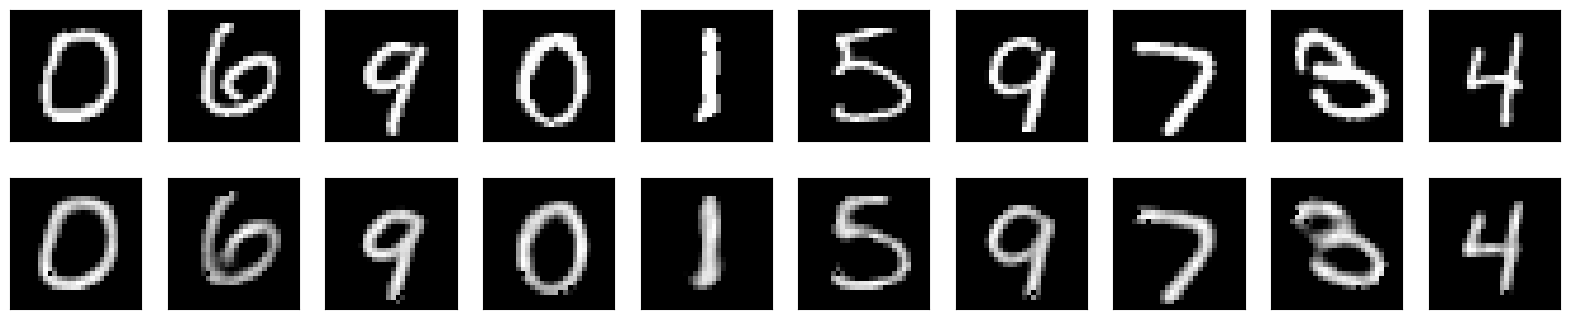

In [20]:
import matplotlib.pyplot as plt
n=10

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(X_test_noisy[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(Decoded[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
import numpy as np

def standardize_data(data):
    mean = np.mean(data, axis=0)
    data_centered = data - mean
    return data_centered, mean

x_train_centered, x_train_mean = standardize_data(X_train_noisy)
x_test_centered, _ = standardize_data(X_test_noisy)

covariance_matrix = np.cov(x_train_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

k=2
eigenvectors_k = eigenvectors[:, :k]

# Step 6: Project the data onto the new subspace
x_train_pca = np.dot(x_train_centered, eigenvectors_k)
x_test_pca = np.dot(x_test_centered, eigenvectors_k)

print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {x_train_pca.shape}")

Original shape: (60000, 784)
Reduced shape: (60000, 2)


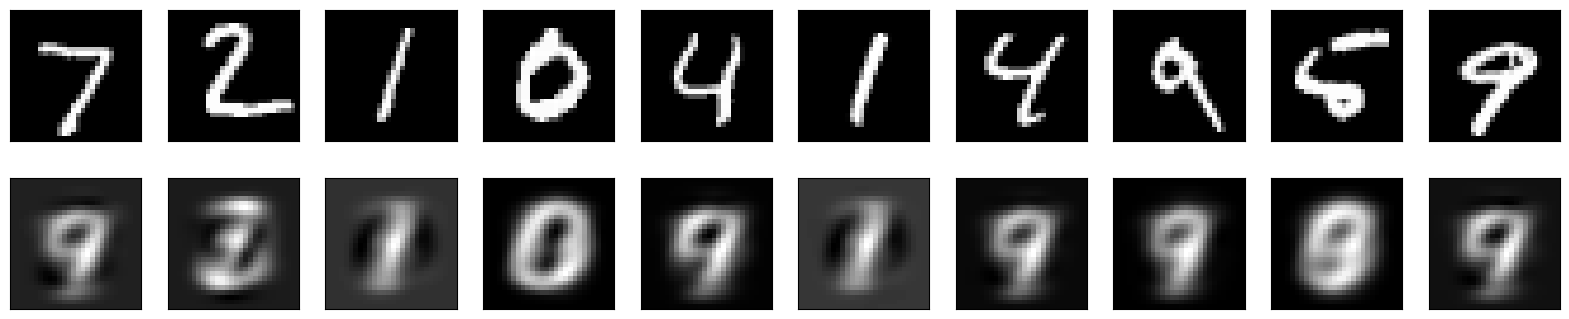

In [22]:
import matplotlib.pyplot as plt

# Reconstruct images from the PCA subspace
x_test_reconstructed = np.dot(x_test_pca, eigenvectors_k.T) + x_train_mean

n = 10  # Number of images to display

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display reconstructed image (after PCA and inverse transform)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [23]:
x_test_reconstructed.shape

(10000, 784)